In [2]:
from fastdtw import fastdtw
from keras.layers import LSTM
from keras.models import Sequential, load_model

from timeseries_ml_utils.data import *
from timeseries_ml_utils.statistics import *
from timeseries_ml_utils.encoders import *

import matplotlib.pyplot as plt


# encoders and decoders
linreg = RegressionLine(16)

# fetch data
data = DataFetcher(["GLD.US"], limit=500)
data.fetch_data().tail()

print(len(data.get_dataframe()))
model_data = DataGenerator(data.get_dataframe(), 
                           {"^trigonometric": identity, 
                            "(Open|High|Low|Close)$": linreg.encode_decode}, 
                           {"GLD.US.Close$": linreg.encode_decode},
                           aggregation_window_size=16, batch_size=10, model_filename="/tmp/keras-foo-1.h5")

print(model_data.batch_feature_shape)
print(model_data.batch_label_shape)
model_data.features, model_data.labels

model = Sequential(name="LSTM-Model-1")
model.add(LSTM(model_data.batch_label_shape[-1],
               name="LSTM-Layer-1",
               batch_input_shape=model_data.batch_feature_shape,
               activation='tanh',
               dropout=0,
               recurrent_dropout=0,
               stateful=True,
               return_sequences=model_data.return_sequences))

model.compile("Adam", loss="mse", metrics=['mae', 'acc'])

train_args = {"epochs": 1,
              "use_multiprocessing": True,
              "workers": 4,
              "shuffle": False}

model_data.fit(model, train_args, frequency=10, relative_accuracy_function=relative_dtw_2, log_dir="/tmp/foo.123/")


predict = model_data.as_predictive_data_generator()

Using TensorFlow backend.


500


ValueError: axes don't match array

In [2]:
prediction, labels, r_squares, stds = predict.back_test(model.predict)



AttributeError: 'numpy.ndarray' object has no attribute 'hist'

(1, 190, 16)

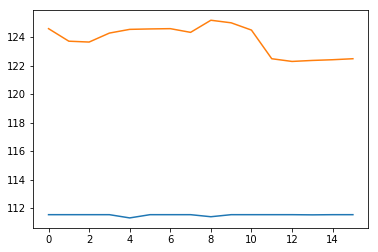

In [12]:

plt.plot(prediction[0][60])
plt.plot(labels[0][60])
prediction.shape

In [1]:
from timeseries_ml_utils.encoders import *
linreg = RegressionLine(12)
